In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
raw_data = pd.read_csv('data_set.csv')
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dataset without feature engineering (Orignal_Dataset) for FLD 1

In [4]:
dataset1 = raw_data.drop('id', axis=1)
for column in dataset1.columns[1:]:
    dataset1[column] = dataset1[column].fillna(dataset1[column].mean())

dataset1.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
dataset1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Dataset with features rearranged for FLD 2

In [5]:
diagnosis = dataset1.diagnosis
dataset2 = dataset1.drop('diagnosis', axis=1)
dataset2 = dataset2.sample(frac=1, axis=1)
dataset2.insert(0 ,'diagnosis', diagnosis)
dataset2

,diagnosis,texture_worst,compactness_se,symmetry_se,texture_se,concave points_se,fractal_dimension_worst,concave points_mean,fractal_dimension_se,texture_mean,...,compactness_worst,fractal_dimension_mean,concavity_mean,smoothness_se,area_mean,radius_se,area_worst,smoothness_mean,concavity_se,compactness_mean
0,1,17.33,0.04904,0.03003,0.9053,0.01587,0.11890,0.14710,0.006193,10.38,...,0.66560,0.07871,0.30010,0.006399,1001.0,1.0950,2019.0,0.11840,0.05373,0.27760
1,1,23.41,0.01308,0.01389,0.7339,0.01340,0.08902,0.07017,0.003532,17.77,...,0.18660,0.05667,0.08690,0.005225,1326.0,0.5435,1956.0,0.08474,0.01860,0.07864
2,1,25.53,0.04006,0.02250,0.7869,0.02058,0.08758,0.12790,0.004571,21.25,...,0.42450,0.05999,0.19740,0.006150,1203.0,0.7456,1709.0,0.10960,0.03832,0.15990
3,1,26.50,0.07458,0.05963,1.1560,0.01867,0.17300,0.10520,0.009208,20.38,...,0.86630,0.09744,0.24140,0.009110,386.1,0.4956,567.7,0.14250,0.05661,0.28390
4,1,16.67,0.02461,0.01756,0.7813,0.01885,0.07678,0.10430,0.005115,14.34,...,0.20500,0.05883,0.19800,0.011490,1297.0,0.7572,1575.0,0.10030,0.05688,0.13280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,26.40,0.02891,0.01114,1.2560,0.02454,0.07115,0.13890,0.004239,22.39,...,0.21130,0.05623,0.24390,0.010300,1479.0,1.1760,2027.0,0.11100,0.05198,0.11590
565,1,38.25,0.02423,0.01898,2.4630,0.01678,0.06637,0.09791,0.002498,28.25,...,0.19220,0.05533,0.14400,0.005769,1261.0,0.7655,1731.0,0.09780,0.03950,0.10340
566,1,34.12,0.03731,0.01318,1.0750,0.01557,0.07820,0.05302,0.003892,28.08,...,0.30940,0.05648,0.09251,0.005903,858.1,0.4564,1124.0,0.08455,0.04730,0.10230
567,1,39.42,0.06158,0.02324,1.5950,0.01664,0.12400,0.15200,0.006185,29.33,...,0.86810,0.07016,0.35140,0.006522,1265.0,0.7260,1821.0,0.11780,0.07117,0.27700


## Projection Vector 

In [6]:
def projection_vector(postive_set, negetive_set):
    m1 = positive_set.mean(axis=0)
    m2 = negetive_set.mean(axis=0)
    
    cov1 = np.zeros((30, 30))
    for x in positive_set:
        cov1 += np.outer(x-m1, x-m1)
    
    cov2 = np.zeros((30, 30))
    for x in negetive_set:
        cov2 += np.outer(x-m2, x-m2)
        
    sw = cov1 + cov2
    invsw = np.linalg.inv(sw)
    
    w = np.matmul(invsw, m2 - m1)
    return w

## Discriminating Point for Projected Points

In [7]:
def discriminant_point(positive_points, negetive_points, w):
    
    m1 = positive_points.mean()
    m2 = negetive_points.mean()
    s1 = positive_points.std()
    s2 = negetive_points.std()
    
    a = s2**2 - s1**2
    b = 2*(m2*(s1**2) - m1*(s2**2))
    c = (m1*s2)**2 - (m2*s1)**2 
    c -= (s1**2)*(s2**2)*(np.log(((len(positive_points)**2)*s2)/((len(negetive_points)**2)*s1)))
    return ((-1*b) + np.sqrt(b**2 - (4*a*c)))/(2*a)

## Evaluation

In [8]:
def func(x, c):
    if x<=c:
        return 1
    else:
        return 0
    
def evaluate_fld(testing_set, w, c):
    c_mat = np.zeros((2,2))
    for example in testing_set:
        x = example[1:]
        y = example[0]
        h = func(w.dot(x), c)
        if y==1 and h==1:
            c_mat[1][1]+=1
            
        elif y==1 and h==0:
            c_mat[1][0]+=1
            
        elif y==0 and h==0: 
            c_mat[0][0]+=1
            
        else:
            c_mat[0][1]+=1
            
    return c_mat

## Evaluating Metrics

In [9]:
def accuracy(c_mat):
    return (c_mat[0][0]+c_mat[1][1])/(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])*100

def precision(c_mat):
    return (c_mat[0][0])/(c_mat[1][0] + c_mat[0][0])*100

def recall(c_mat):
    return (c_mat[1][1])/(c_mat[1][0] + c_mat[1][1])*100

## Spiltting Dataset into Training Data and Testing Data

In [10]:
training_data = dataset1.sample(frac=2/3)
testing_data = dataset1.drop(training_data.index)
training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
139,0,11.280,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.047960,0.1771,...,11.920,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.086110,0.2102,0.06784
448,0,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,...,16.300,28.39,108.10,830.5,0.1089,0.26490,0.377900,0.095940,0.2471,0.07463
153,0,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.017860,0.1830,...,11.990,16.30,76.25,440.8,0.1341,0.08971,0.071160,0.055060,0.2859,0.06772
51,0,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,...,14.670,23.19,96.08,656.7,0.1089,0.15820,0.105000,0.085860,0.2346,0.08025
463,0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.770,24.02,82.68,495.1,0.1342,0.18080,0.186000,0.082880,0.3210,0.07863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,17.200,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,...,23.320,33.82,151.60,1681.0,0.1585,0.73940,0.656600,0.189900,0.3313,0.13390
126,1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,...,16.890,35.64,113.20,848.7,0.1471,0.28840,0.379600,0.132900,0.3470,0.07900
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.08340,0.000000,0.000000,0.3058,0.09938
13,1,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.053640,0.1847,...,16.840,27.66,112.00,876.5,0.1131,0.19240,0.232200,0.111900,0.2809,0.06287


In [11]:
testing_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
16,1,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,...,13.03,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
551,0,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,...,12.02,28.26,77.80,436.6,0.1087,0.1782,0.15640,0.06413,0.3169,0.08032
554,0,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732


## Finding the Projection Vector for the given Training Data

In [12]:
training_set = training_data.to_numpy()
testing_set = testing_data.to_numpy()

positive_set = []
negetive_set = []
for example in training_set:
    if example[0] == 1:
        positive_set.append(example[1:])
    else:
        negetive_set.append(example[1:])

positive_set = np.array(positive_set)
negetive_set = np.array(negetive_set)
w = projection_vector(positive_set, negetive_set)
w

array([ 1.10963054e-03,  2.06189466e-04, -1.94535893e-04,  1.04243582e-05,
       -2.36582463e-02,  2.04999660e-01, -1.10608009e-01, -1.54754127e-01,
       -3.07792481e-02,  4.89550370e-02, -3.01162459e-02,  2.79652734e-03,
        1.19744999e-04,  1.20333695e-04, -9.87968346e-01, -6.54664517e-02,
        9.62094282e-02, -1.91125828e-01,  2.76946668e-02,  8.19071115e-01,
       -8.27545622e-03, -7.91076164e-04,  2.23350375e-04,  3.93358686e-05,
        1.42915336e-02, -9.77626582e-03, -3.97546627e-05, -2.71204474e-02,
       -3.73715759e-02, -2.05072534e-01])

## Plotting the distribution of Positive and Negetive Classes after Projection

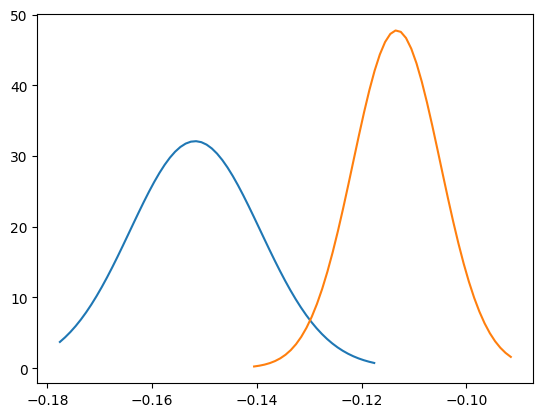

In [13]:
positive_points = np.array([w.dot(x) for x in positive_set])
negetive_points = np.array([w.dot(x) for x in negetive_set])

x = np.arange(positive_points.min(), positive_points.max(), 0.001)
plt.plot(x, norm.pdf(x, positive_points.mean(), positive_points.std()))

x = np.arange(negetive_points.min(), negetive_points.max(), 0.001)
plt.plot(x, norm.pdf(x, negetive_points.mean(), negetive_points.std()))

## Finding the Dicriminating Point for the Projected Points

In [14]:
c = discriminant_point(positive_points, negetive_points, w)
c

-0.1306563856050155

In [15]:
c_mat = evaluate_fld(testing_set, w, c)
print(c_mat)
print(f"Accuracy: {accuracy(c_mat)}")
print(f"Precision: {precision(c_mat)}")
print(f"Recall: {recall(c_mat)}")

[[119.   1.]
 [  3.  67.]]
Accuracy: 97.89473684210527
Precision: 97.54098360655738
Recall: 95.71428571428572


## Fischer's Linear Disriminant 1

In [19]:
accuracy_list = np.zeros(10)
precision_list = np.zeros(10)
recall_list = np.zeros(10)
w = np.zeros(31)
for i in range(10):
    
    training_data = dataset1.sample(frac=2/3)
    testing_data = dataset1.drop(training_data.index)
    training_set = training_data.to_numpy()
    testing_set = testing_data.to_numpy()
    
    positive_set = []
    negetive_set = []
    for example in training_set:
        if example[0] == 1:
            positive_set.append(example[1:])
        else:
            negetive_set.append(example[1:])
    
    positive_set = np.array(positive_set)
    negetive_set = np.array(negetive_set)
    w = projection_vector(positive_set, negetive_set)
    
    positive_points = np.array([w.dot(x) for x in positive_set])
    negetive_points = np.array([w.dot(x) for x in negetive_set])
    
    c = discriminant_point(positive_points, negetive_points, w)
    c_mat = evaluate_fld(testing_set, w, c)
    
    print(f"Model No.{i+1}")
    print(f"Confusion Matrix:\n{c_mat}")
    print(f"Accuracy = {accuracy(c_mat)}")
    print(f"Precision = {precision(c_mat)}")
    print(f"Recall = {recall(c_mat)}")
    
    accuracy_list[i] =  accuracy(c_mat)
    precision_list[i] = precision(c_mat)
    recall_list[i] =  recall(c_mat)
    print("\n")
    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

Model No.1
Confusion Matrix:
[[116.   1.]
 [  8.  65.]]
Accuracy = 95.26315789473684
Precision = 93.54838709677419
Recall = 89.04109589041096


Model No.2
Confusion Matrix:
[[112.   3.]
 [  5.  70.]]
Accuracy = 95.78947368421052
Precision = 95.72649572649573
Recall = 93.33333333333333


Model No.3
Confusion Matrix:
[[119.   1.]
 [  5.  65.]]
Accuracy = 96.84210526315789
Precision = 95.96774193548387
Recall = 92.85714285714286


Model No.4
Confusion Matrix:
[[117.   2.]
 [  9.  62.]]
Accuracy = 94.21052631578948
Precision = 92.85714285714286
Recall = 87.32394366197182


Model No.5
Confusion Matrix:
[[120.   1.]
 [  8.  61.]]
Accuracy = 95.26315789473684
Precision = 93.75
Recall = 88.40579710144928


Model No.6
Confusion Matrix:
[[114.   4.]
 [  4.  68.]]
Accuracy = 95.78947368421052
Precision = 96.61016949152543
Recall = 94.44444444444444


Model No.7
Confusion Matrix:
[[110.   0.]
 [  6.  74.]]
Accuracy = 96.84210526315789
Precision = 94.82758620689656
Recall = 92.5


Model No.8
Confus

## Fischer's Linear Discriminant 2

In [20]:
accuracy_list = np.zeros(10)
precision_list = np.zeros(10)
recall_list = np.zeros(10)
w = np.zeros(31)
for i in range(10):
    
    training_data = dataset2.sample(frac=2/3)
    testing_data = dataset2.drop(training_data.index)
    training_set = training_data.to_numpy()
    testing_set = testing_data.to_numpy()
    
    positive_set = []
    negetive_set = []
    for example in training_set:
        if example[0] == 1:
            positive_set.append(example[1:])
        else:
            negetive_set.append(example[1:])
    
    positive_set = np.array(positive_set)
    negetive_set = np.array(negetive_set)
    w = projection_vector(positive_set, negetive_set)
    
    positive_points = np.array([w.dot(x) for x in positive_set])
    negetive_points = np.array([w.dot(x) for x in negetive_set])
    
    c = discriminant_point(positive_points, negetive_points, w)
    c_mat = evaluate_fld(testing_set, w, c)
    
    print(f"Model No.{i+1}")
    print(f"Confusion Matrix:\n{c_mat}")
    print(f"Accuracy = {accuracy(c_mat)}")
    print(f"Precision = {precision(c_mat)}")
    print(f"Recall = {recall(c_mat)}")
    
    accuracy_list[i] =  accuracy(c_mat)
    precision_list[i] = precision(c_mat)
    recall_list[i] =  recall(c_mat)
    print("\n")
    
print(f"Accuracy:\n Mean = {accuracy_list.mean()}  Standard Deviation = {accuracy_list.std()}")
print(f"Precision:\n Mean = {precision_list.mean()}  Standard Deviation = {precision_list.std()}")
print(f"Recall:\n Mean = {recall_list.mean()}  Standard Deviation = {recall_list.std()}")

Model No.1
Confusion Matrix:
[[125.   2.]
 [  4.  59.]]
Accuracy = 96.84210526315789
Precision = 96.89922480620154
Recall = 93.65079365079364


Model No.2
Confusion Matrix:
[[119.   3.]
 [  3.  65.]]
Accuracy = 96.84210526315789
Precision = 97.54098360655738
Recall = 95.58823529411765


Model No.3
Confusion Matrix:
[[117.   3.]
 [  5.  65.]]
Accuracy = 95.78947368421052
Precision = 95.90163934426229
Recall = 92.85714285714286


Model No.4
Confusion Matrix:
[[113.   4.]
 [  4.  69.]]
Accuracy = 95.78947368421052
Precision = 96.58119658119658
Recall = 94.52054794520548


Model No.5
Confusion Matrix:
[[118.   4.]
 [  6.  62.]]
Accuracy = 94.73684210526315
Precision = 95.16129032258065
Recall = 91.17647058823529


Model No.6
Confusion Matrix:
[[116.   5.]
 [  4.  65.]]
Accuracy = 95.26315789473684
Precision = 96.66666666666667
Recall = 94.20289855072464


Model No.7
Confusion Matrix:
[[121.   0.]
 [  8.  61.]]
Accuracy = 95.78947368421052
Precision = 93.7984496124031
Recall = 88.4057971014